#### Problem statement
Given File 'startup_funding.csv'

There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

##### Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


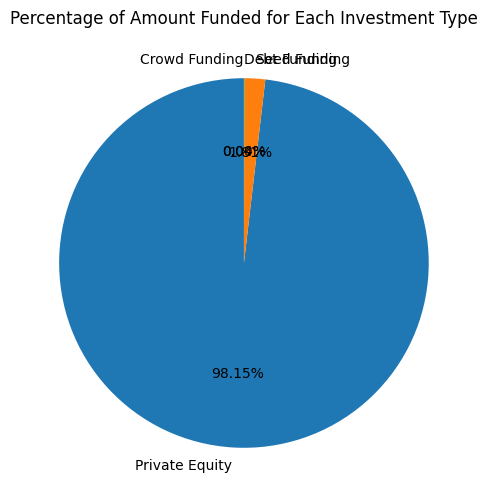

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
start_up = pd.read_csv('startup_funding.csv')
df = start_up.copy()

# Drop rows where 'InvestmentType' is NaN
df.dropna(subset=['InvestmentType'], inplace=True)

# Manually create a mapping for common misspellings to correct them
spelling_corrections = {
    'PrivateEquity': 'Private Equity',
    'SeedFunding': 'Seed Funding',
    'DebtFunding': 'Debt Funding',
    'Crowd funding': 'Crowd Funding'
    # Add more potential misspellings here
}

# Apply spelling corrections using the mapping
df['InvestmentType'] = df['InvestmentType'].replace(spelling_corrections)

# Remove commas from the 'AmountInUSD' column and convert to float
df['AmountInUSD'] = df['AmountInUSD'].str.replace(",", "").astype(float)

# Fill NaN values in 'AmountInUSD' with 0
df['AmountInUSD'] = df['AmountInUSD'].fillna(0)

# Calculate total amount of funding
Total_amt = df['AmountInUSD'].sum()

# Group by 'InvestmentType' and calculate the total amount for each type
investment_group = df.groupby('InvestmentType')['AmountInUSD'].sum()

# Calculate the percentage for each investment type
investment_per = round(investment_group * 100 / Total_amt, 2)

# Sort the percentages in descending order
investment_per = investment_per.sort_values(ascending=False)

# Print the investment type and percentage with 2 decimal places
for investment_type, percentage in investment_per.items():
    print(f'{investment_type} {percentage:.2f}')

# Create a pie chart for the investment types
plt.figure(figsize=(8, 6))
plt.pie(investment_per, labels=investment_per.index, autopct='%.2f%%', startangle=90)
plt.title('Percentage of Amount Funded for Each Investment Type')
plt.show()